In [60]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [61]:
test_data = '/content/drive/MyDrive/4.1/PRML Lab/test-Minimum-Error-Rate-Classifier.txt'

In [62]:
df = pd.read_csv(test_data, sep=",",  names = ['A', 'B'])

df

,A,B
0,1,1.0
1,1,-1.0
2,4,5.0
3,-2,2.5
4,0,2.0
5,2,-3.0


In [65]:
#parameters
mu1 = np.array([0, 0])
sigma1 = np.array([[0.25, 0.3], [0.3, 1]])
prior_w1 = 0.5

mu2 = np.array([2, 2])
sigma2 = np.array([[0.5, 0], [0, 0.5]])
prior_w2 = 0.5

X1 = np.array(df['A'])
X2 = np.array(df['B'])
trans_x = np.array([X1,X2]).T
trans_x

array([[ 1. ,  1. ],
       [ 1. , -1. ],
       [ 4. ,  5. ],
       [-2. ,  2.5],
       [ 0. ,  2. ],
       [ 2. , -3. ]])

In [68]:
def normal_distribution(x, sigma, mu):
  sigma_D = np. linalg.det(sigma)
  sigma_I = np.linalg.inv(sigma)
  D = 2
  denom = np.sqrt(((2.0*math.pi)**D)*sigma_D)
  result = np.empty(len(x))

  for ind,x in enumerate(x):
    exp = np.exp(-0.5 * np.dot((x-mu), np.dot(sigma_I,(x-mu).T)))
    result[ind] = exp/denom

  return result

normal_dist1 = normal_distribution(trans_x,sigma1,mu1) * prior_w1
normal_dist2 = normal_distribution(trans_x,sigma2,mu2) * prior_w2

normal_dist1, normal_dist2


(array([2.60957317e-02, 6.13712786e-04, 2.44194018e-15, 4.76386919e-13,
        8.74097521e-03, 8.52320872e-15]),
 array([2.15392793e-02, 7.22562324e-06, 3.59742598e-07, 1.39487343e-08,
        2.91502447e-03, 2.21033492e-12]))

In [70]:
label = []
pdf = []

for norm_value1, norm_value2 in zip(normal_dist1,normal_dist2):
  if norm_value1 > norm_value2:
    label.append("1")
    pdf.append(norm_value1)
  else:
    label.append("2")
    pdf.append(norm_value2)

df['PDF'] = pdf
df['Class'] = label
df

,A,B,PDF,Class
0,1,1.0,2.609573e-02,1
1,1,-1.0,6.137128e-04,1
2,4,5.0,3.597426e-07,2
3,-2,2.5,1.394873e-08,2
4,0,2.0,8.740975e-03,1
5,2,-3.0,2.210335e-12,2


In [96]:
dummy1 = np.linspace(-5, 5, 800)
dummy2 = np.linspace(-5, 5, 800)
pdf = np.empty((800,800))
decision_boundary = np.zeros((800,800))
decision_boundary

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [97]:
for i in range(len(dummy1)):
  for j in range(len(dummy1)):

    normal1 = normal_distribution(np.array([[dummy1[i],dummy2[j]]]),sigma1,mu1)
    normal2 = normal_distribution(np.array([[dummy1[i],dummy2[j]]]),sigma2,mu2)

    pdf[i][j] = max(normal1, normal2)

    if abs((np.log10(normal1)-np.log10(normal2)) + np.log10(prior_w1) - np.log10(prior_w2)) <= 0.1:
      decision_boundary[i][j] = 1


<ipython-input-97-bdfd7d8404ef>:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pdf[i][j] = max(normal1, normal2)


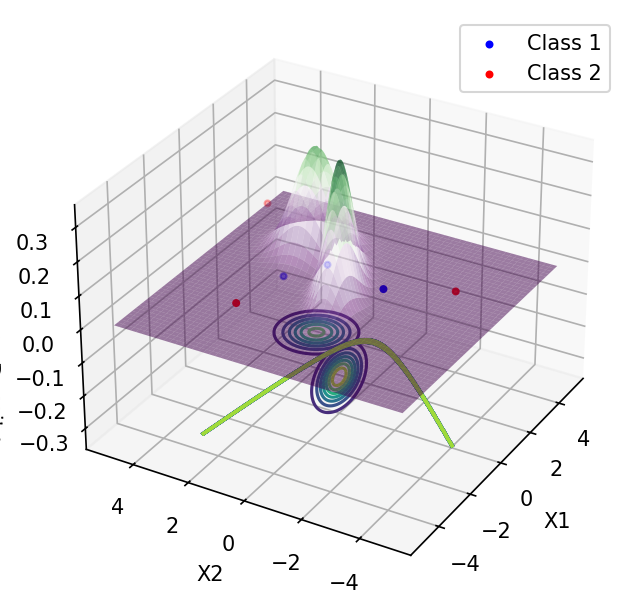

In [104]:
class1_x1 = list(df[df['Class'] == '1']['A'])
class1_x2 = list(df[df['Class'] == '1']['B'])
pdf_class1 = list(df[df['Class'] == '1']['PDF'])

class2_x1 = list(df[df['Class'] == '2']['A'])
class2_x2 = list(df[df['Class'] == '2']['B'])
pdf_class2 = list(df[df['Class'] == '2']['PDF'])

X, Y = np.meshgrid(dummy1,dummy2)

fig = plt.figure(figsize=(5, 5), dpi = 150)

ax = plt.axes(projection = '3d')
surf = ax.plot_surface(X,Y, pdf,cmap='PRGn',linewidth = 0,antialiased = True, alpha = 0.5)

ax.contour(X, Y, pdf, offset=-0.25)
ax.contour(X, Y, decision_boundary, offset=-0.25)
ax.scatter(class1_x1, class1_x2, pdf_class1, s = 8, facecolor="blue",marker='o', label='Class 1')
ax.scatter(class2_x1, class2_x2, pdf_class2, s = 8, facecolor="red",marker='o',label='Class 2')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Probability Density')
ax.set_zlim(-.35,.35)
ax.view_init(30,210)
ax.legend()
plt.show()